# Q2
## Importing and reading data:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("insurance.csv")

age = data["age"].to_numpy().reshape(1338,1)
bmi = data["bmi"].to_numpy().reshape(1338,1)
children = data["children"].to_numpy().reshape(1338,1)
charges = data["charges"].to_numpy().reshape(1338,1)

X_train = np.ndarray((1338,3), dtype=np.float64)
Y_train = np.ndarray((1338,1), dtype=np.float64)

X_train[:,0] = age[:,0]
X_train[:,1] = bmi[:,0]
X_train[:,2] = children[:,0]
# X_train = normalize(X_train)
Y_train = charges

**Required Functions**

In [3]:
def compute_cost(X, Y, theta):
    m = Y.size
    
    prediction = np.dot(X, theta)
    error = prediction - Y
    cost = 1/(2*m) * np.dot(error.T, error)
    
    return cost

In [4]:
def update_parameters(X, Y, theta, learning_rate):
    m = Y.size
    
    prediction = np.dot(X, theta)
    error = prediction - Y
    theta = theta - (learning_rate * (1/m) * np.sum(np.multiply(X, error)))
    
    return theta

### **A) Implementation of Gradient Descent, Stochastic Gradient Descent, Mini-batch Gradient Descent:**

In [5]:
# GRADIENT DESCENT
def gradient_descent(X, Y, theta, learning_rate, num_iterations):
    prev_costs = []
    
    for i in range(num_iterations):
        cost = compute_cost(X, Y, theta)
        prev_costs.append(cost)
        theta = update_parameters(X, Y, theta, learning_rate)
        
    
    return theta, [i[0].item() for i in prev_costs]


# Stochastic Gradient Descent
def SGD(X, Y, learning_rate, theta, num_iter=100):
    sgd_costs = []
    for i in range(num_iter):
        sample = np.random.randint(0, 1338)
        theta = update_parameters(X[sample], Y[sample], theta, learning_rate)
        sgd_costs.append(compute_cost(X, Y, theta))
    
    return theta, [i.item() for i in sgd_costs]

# Mini-batch Gradient Descent
def MBGD(X, Y, learning_rate, theta, batch_size,num_iter=100):
    mbgd_costs = []
    for i in range(num_iter):
        samples = np.random.randint(0, 1338, size=batch_size)
        cost = compute_cost(X, Y, theta)
        theta = update_parameters(X[samples], Y[samples], theta, learning_rate)
        mbgd_costs.append(cost)
    return theta, [i.item() for i in mbgd_costs]

In [6]:
learning_rate = 0.0001 #Step size
iterations = 100 #No. of iterations
theta = np.random.rand(3).reshape(3,1) #Pick some random values to start with
batch_size = 25

gd_theta, gd_costs = gradient_descent(X_train, Y_train, theta=theta, num_iterations=iterations, learning_rate=learning_rate)
sgd_theta, sgd_costs = SGD(X_train, Y_train, learning_rate, theta, iterations)
mbgd_theta, mbgd_costs = MBGD(X_train, Y_train, learning_rate, theta, batch_size, iterations)

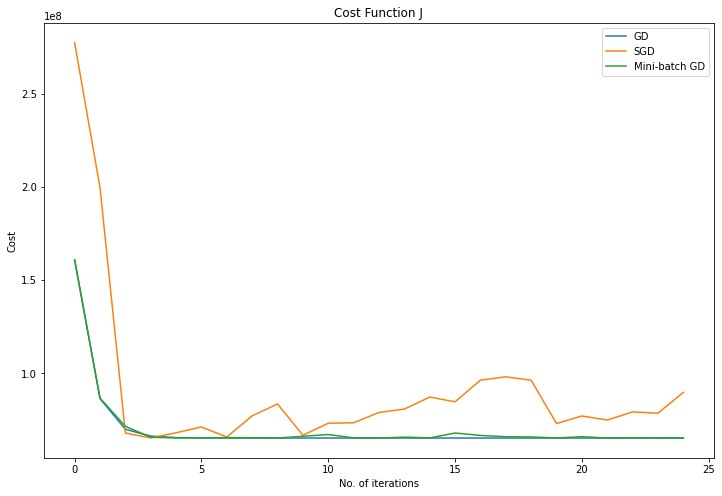

In [7]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(gd_costs[:25])
plt.plot(sgd_costs[:25])
plt.plot(mbgd_costs[:25])
plt.gcf().set_size_inches(12, 8)
plt.legend(["GD", "SGD", "Mini-batch GD"])
plt.show()

### **B) Compare SGD, GD, Mini-batch GD:**
**Min Error** : GD < Mini-batch < SGD. <br>
**Time to Converge** : Mini Batch < SGD < Batch

### **C) For GD, initialize parameters by 0 and compare results with parameters initialized randomly**


In [8]:
learning_rate = 0.0001 #Step size
iterations = 100 #No. of iterations
zero_theta = np.zeros((3,1))

_, new_gd_costs = gradient_descent(X_train, Y_train, theta=theta, num_iterations=iterations, learning_rate=learning_rate)

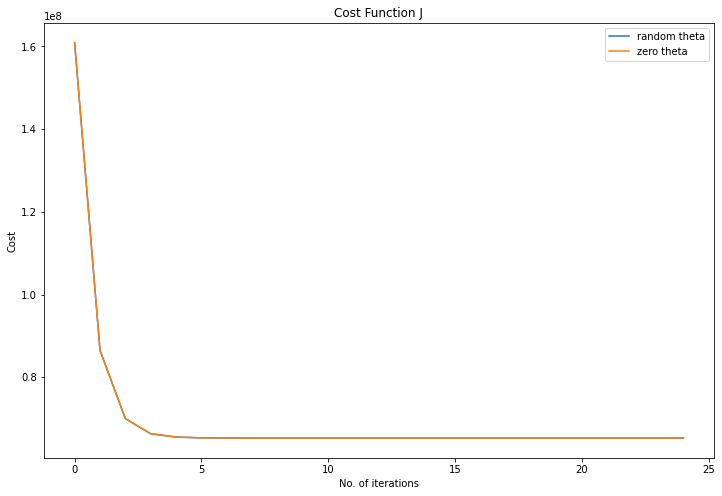

In [9]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(gd_costs[:25])
plt.plot(new_gd_costs[:25])
plt.gcf().set_size_inches(12, 8)
plt.legend(["random theta", "zero theta"])
plt.show()

In this case there is no difference, but more generally in deep learning and neural networks, If all the weights are initialized with 0, the derivative with respect to loss function is the same for every w in W[l], thus all weights have the same value in subsequent iterations.

#### **D) Use MAE Loss function and implement SGD again, compare the results with MSE Loss function. Were there any underivable spots while updating the weights? what did you do?**

In [10]:
def MAE(X,Y,theta):
    return 1/(X.shape[0]) *(np.sum(np.abs(np.dot(X, theta) - Y)))
def MAE_grad(X,Y,theta):
    prediction = np.dot(X, theta)
    # print(X.T.shape, np.sign(prediction - Y).shape)
    return 1/(X.shape[0]) * (X.T@np.sign(prediction - Y))

def SGD_MAE(X, Y, learning_rate, theta, num_iter=100):
    sgd_costs = []
    for i in range(num_iter):
        sample = np.random.randint(0, 1338)
        J = MAE(X,Y,theta)
        grad = MAE_grad(X[sample,:],Y[sample],theta)
        theta = theta - learning_rate*grad    
        sgd_costs.append(J)
    return theta, [i.item() for i in sgd_costs]

In [11]:
_, new_sgd_costs = SGD_MAE(X_train, Y_train, learning_rate, iterations)

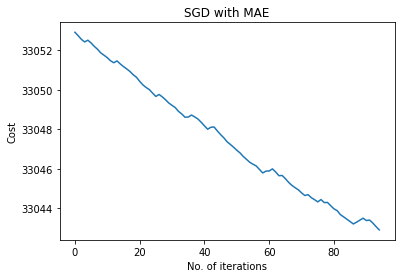

In [14]:
plt.title('SGD with MAE')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(new_sgd_costs[:95])
plt.show()

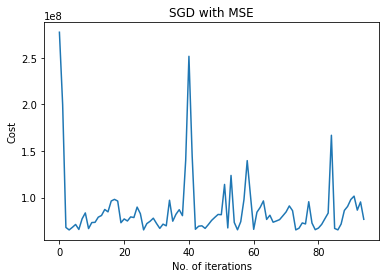

In [15]:
plt.title('SGD with MSE')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(sgd_costs[:95])
plt.show()

We dont have any underivable spots because loss was never equal to 0, even if we had underivable spots we can use [subgradient](https://en.wikipedia.org/wiki/Subgradient_method) and randomly choose a number between -1 and 1 and multipy it in the entry. 

### **E) Examine that high learning rate cannot converge** 

In [16]:
iterations = 100 #No. of iterations
theta = np.random.rand(3).reshape(3,1) #Pick some random values to start with
batch_size = 25

_, gd_costs = gradient_descent(X_train, Y_train, theta=theta, num_iterations=iterations, learning_rate=0.0001)
_, sec_gd_costs = gradient_descent(X_train, Y_train, theta=theta, num_iterations=iterations, learning_rate=0.01)

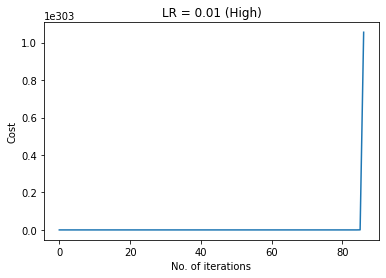

In [17]:
plt.title('LR = 0.01 (High)')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(sec_gd_costs)
plt.show()

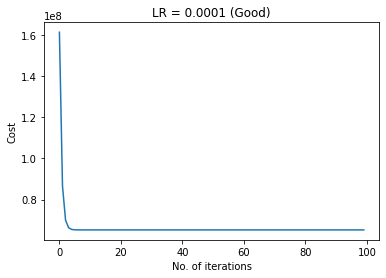

In [18]:
plt.title('LR = 0.0001 (Good)')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(gd_costs)
plt.show()

### **F) Examine that low learning rate converges to minimum slower** 

In [19]:
iterations = 100 #No. of iterations
theta = np.random.rand(3).reshape(3,1) #Pick some random values to start with
batch_size = 25

_, gd_costs = gradient_descent(X_train, Y_train, theta=theta, num_iterations=iterations, learning_rate=0.0001)
_, sec_gd_costs = gradient_descent(X_train, Y_train, theta=theta, num_iterations=iterations, learning_rate=0.00001)

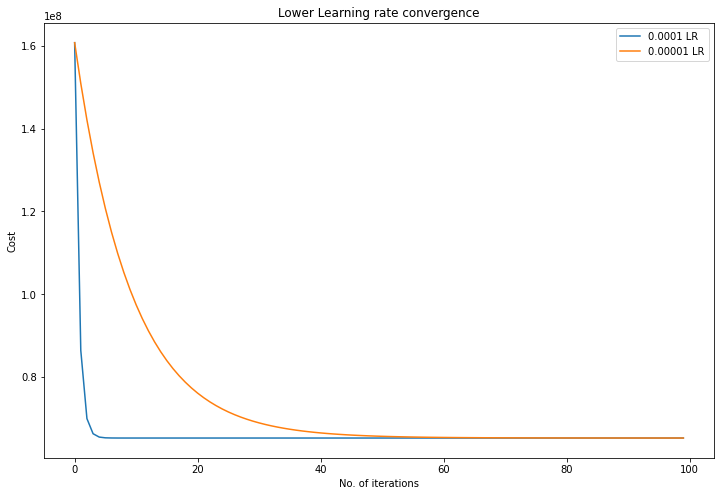

In [20]:
plt.title('Lower Learning rate convergence')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(gd_costs)
plt.plot(sec_gd_costs)
plt.gcf().set_size_inches(12, 8)
plt.legend(["0.0001 LR", "0.00001 LR"])
plt.show()

### **G) Normalize X matrix and try SGD again, compare the results**

In [21]:
from sklearn.preprocessing import normalize
X_norm = normalize(X_train)

learning_rate = 0.0001 #Step size
iterations = 100 #No. of iterations
theta = np.random.rand(3).reshape(3,1) #Pick some random values to start with

_, sgd_costs = SGD(X_train, Y_train, learning_rate, theta, 500)
_, norm_sgd_costs = SGD(X_norm, Y_train, 0.03, theta, 500)

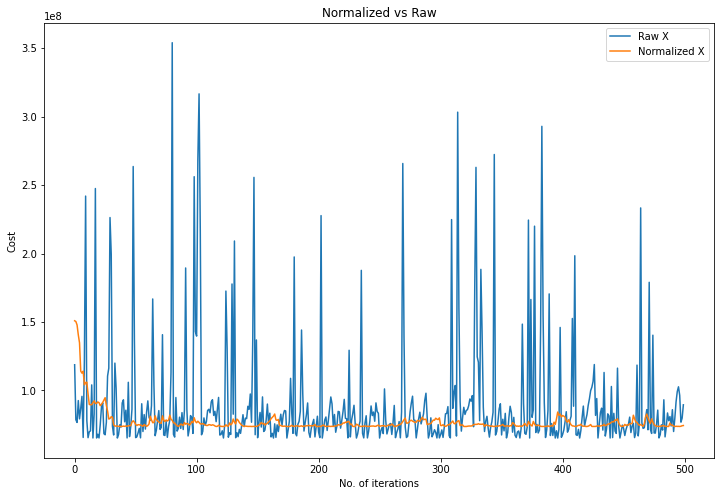

In [22]:
plt.title('Normalized vs Raw')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(sgd_costs)
plt.plot(norm_sgd_costs)
plt.legend(["Raw X", "Normalized X"])
plt.gcf().set_size_inches(12, 8)
plt.show()

We can see that normalization helps algorithm converge faster and more efficient